# Code for Chart Creation
*Including Calculation of Regularization Paths*

### Predictions, Errors and Forecast Charts

### Major Forecast Charts

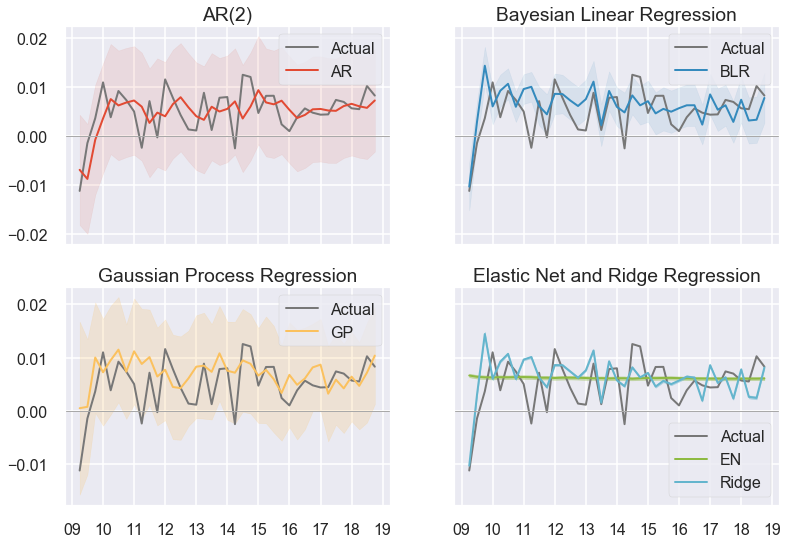

In [19]:
%matplotlib inline
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.dates as dt
import matplotlib.axes as ax
import seaborn as sns
import pandas as pd

plt.style.use('seaborn-poster')

pred = pd.read_csv('predictions2.csv')

pred.loc[:,'AR_std'] *= 1.96 
pred.loc[:,'GP_std'] *= 1.96 
pred.loc[:,'BLR_std'] *= 1.96 
pred.loc[:,'EN_std'] *= 1.96 
pred.loc[:,'Ridge_std'] *= 1.96 

from matplotlib.dates import DateFormatter
pred.Date = dt.datestr2num(pred.Date)
myFmt = DateFormatter("%y") 

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')

ax1.plot_date('Date', 'Actual', fmt='', data=pred, linewidth=2, color='#777777')
ax1.plot_date('Date', 'AR', fmt='', data=pred, linewidth=2, color='#e24a33')
ax1.fill_between(pred.Date, pred.AR - pred.AR_std, pred.AR + pred.AR_std, color='#e24a33', alpha=0.1)
ax1.set_title('AR(2)')
ax1.axhline(linewidth=1, color='darkgrey')
ax1.legend()

ax2.plot_date('Date', 'Actual', fmt='', data=pred, linewidth=2, color='#777777')
ax2.plot_date('Date', 'BLR', fmt='', data=pred, linewidth=2, color='#348abd')
ax2.fill_between(pred.Date, pred.BLR - pred.BLR_std, pred.BLR + pred.BLR_std, color='#348abd', alpha=0.1)
ax2.axhline(linewidth=1, color='darkgrey')
ax2.set_title('Bayesian Linear Regression')
ax2.legend()

ax3.plot_date('Date', 'Actual', fmt='', data=pred, linewidth=2, color='#777777')
ax3.plot_date('Date', 'GP', fmt='', data=pred, linewidth=2, color='#fbc15e')
ax3.fill_between(pred.Date, pred.GP - pred.GP_std, pred.GP + pred.GP_std, color='#fbc15e', alpha=0.2)
ax3.axhline(linewidth=1, color='darkgrey')
ax3.set_title('Gaussian Process Regression')
ax3.legend()
ax4.xaxis.set_major_formatter(myFmt)

ax4.plot_date('Date', 'Actual', fmt='', data=pred, linewidth=2, color='#777777')
ax4.plot_date('Date', 'EN', fmt='', data=pred, linewidth=2, color='#8eba42')
ax4.fill_between(pred.Date, pred.EN - pred.EN_std, pred.EN + pred.EN_std, color='#8eba42', alpha=0.4)
ax4.plot_date('Date', 'Ridge', fmt='', data=pred, linewidth=2, color='#64b5cd')
ax4.fill_between(pred.Date, pred.Ridge - pred.Ridge_std, pred.Ridge + pred.Ridge_std, color='#64b5cd', alpha=0.4)
ax4.axhline(linewidth=1, color='darkgrey')
ax4.set_title('Elastic Net and Ridge Regression')
ax4.legend()
ax4.xaxis.set_major_formatter(myFmt)

# Turn on the proper x or y axes ticks.
for ax in [ax1, ax2, ax3, ax4]:
    # Hide all ticks and labels
    ax.xaxis.set_major_formatter(myFmt)

f.subplots_adjust(hspace=0.2)
plt.savefig('NowcastPreds.png')

### Regularization Path Charts

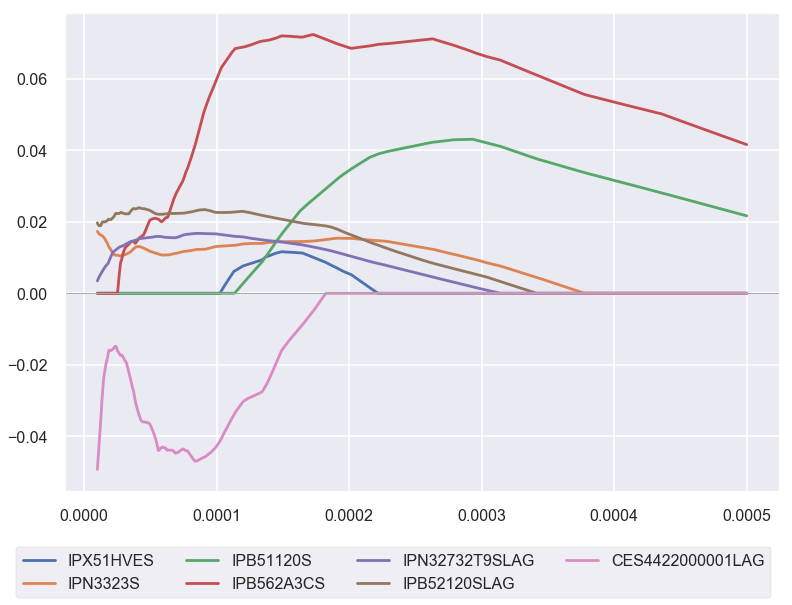

In [20]:
import statsmodels.api as sm

from datetime import datetime
import numpy as np

from sklearn.linear_model import ElasticNet, enet_path, lasso_path, Ridge
from sklearn.datasets import make_regression
from sklearn import preprocessing, linear_model
from sklearn.metrics import mean_squared_error

from itertools import cycle
from matplotlib.font_manager import FontProperties
from sklearn.linear_model import Ridge

# fitting regression
all_data = pd.read_csv("data.csv")
X = all_data.drop('date', axis = 1)
gdp_data = pd.read_csv("gdp_growth.csv")

y = pd.DataFrame(gdp_data['gdp'])

n_alphas = 1000

plt.style.use('seaborn-poster')

plot_DF = pd.DataFrame({'alpha':[0.0]*n_alphas})
for col in X.columns:
   plot_DF[col]=0

alphas = np.linspace(0.00001,0.0005,n_alphas)

plot_DF['alpha'] = alphas
for i in range(n_alphas):
    alpha_i = float(np.array(plot_DF.iloc[i:i+1,0:1]))
    regr = ElasticNet(alpha=alpha_i,l1_ratio=0.5,max_iter=1000, 
                      normalize=True, positive=False)
    temp_fit=regr.fit(X.iloc[:114,:], y.iloc[:114,:])
    plot_DF.iloc[i,1:] = temp_fit.coef_

_,ids2plot = np.where(abs(plot_DF.iloc[300:301,:])>=0.01)
plot_DF = plot_DF.iloc[:,ids2plot]
plot_DF['alpha'] = alphas


for col in plot_DF.columns[plot_DF.columns != 'alpha']:
    fig = plt.plot('alpha', col, data = plot_DF)

plt.axhline(linewidth=1, color='darkgrey')
lgd = plt.legend(ncol=4,bbox_to_anchor=(1, -0.1))
plt.savefig('ENRegPath.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

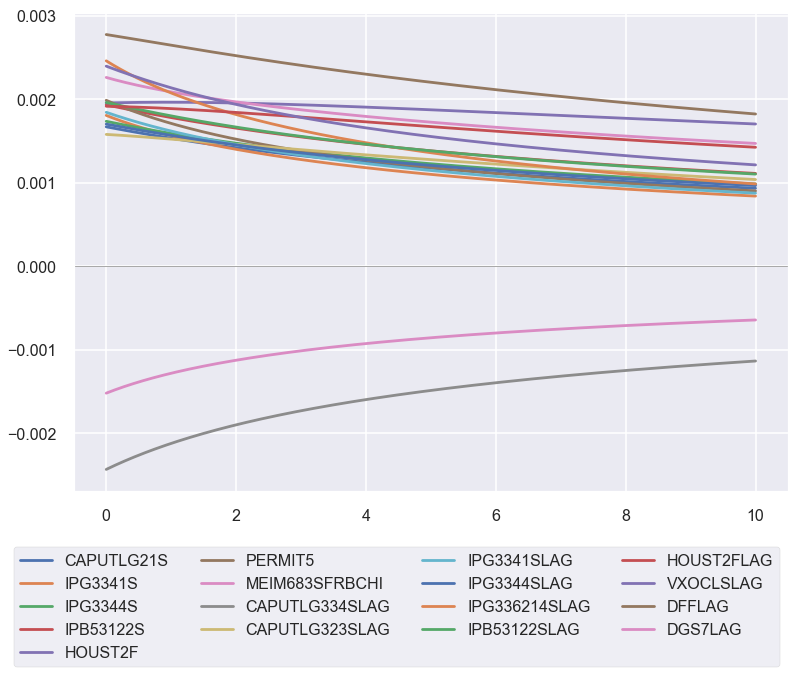

In [21]:
n_alphas = 1000

plt.style.use('seaborn-poster')

plot_DF = pd.DataFrame({'alpha':[0.0]*n_alphas})
for col in X.columns:
   plot_DF[col]=0

alphas = np.linspace(0,10,n_alphas)

plot_DF['alpha'] = alphas
for i in range(n_alphas):
    alpha_i = float(np.array(plot_DF.iloc[i:i+1,0:1]))
    regr = Ridge(alpha=alpha_i,max_iter=1000,
                 normalize=True,fit_intercept=False)
    temp_fit=regr.fit(X.iloc[:114,:], y.iloc[:114,:])
    plot_DF.iloc[i,1:] = temp_fit.coef_[0]

_,ids2plot = np.where(abs(plot_DF.iloc[0:1,:])>=0.0015)
plot_DF = plot_DF.iloc[:,ids2plot]
plot_DF['alpha'] = alphas


for col in plot_DF.columns[plot_DF.columns != 'alpha']:
    plt.plot('alpha', col, data = plot_DF)
plt.axhline(linewidth=1, color='darkgrey')
lgd = plt.legend(ncol=4,bbox_to_anchor=(1, -0.1))

plt.savefig('RidgeRegPath.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

### Evolution of Forecasts Chart

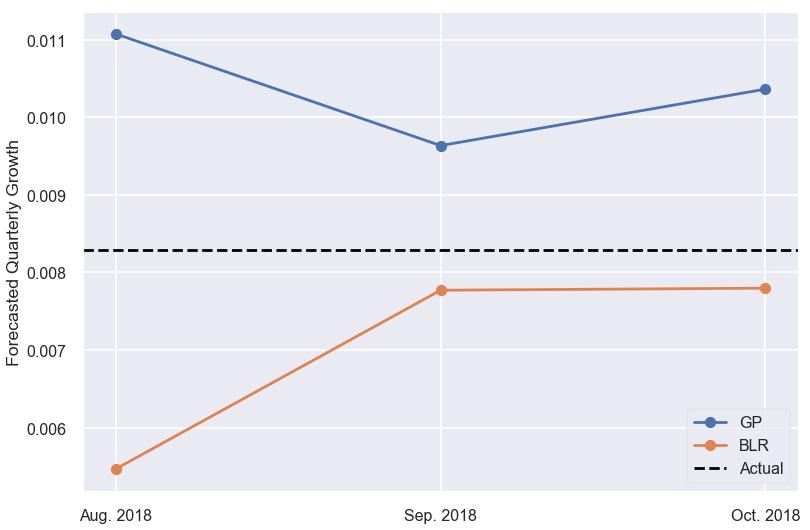

In [22]:
smoothed = pd.read_csv('nowcast.csv')
gdp = pd.read_csv('gdp_growth.csv')

plt.style.use('seaborn-poster')
plt.ylabel('Forecasted Quarterly Growth')
plt.plot_date('date', 'GP', fmt = 'o', linestyle = '-', data = smoothed)
plt.plot_date('date', 'BLR', fmt = 'o', linestyle = '-', data = smoothed)
plt.axhline(gdp.gdp[113], label = 'Actual', c= 'black', linestyle = '--')
plt.legend()
plt.savefig('nowcast.png')